In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
#ts.plot()
#plt.show()

In [4]:
dfabstract = pd.read_csv('../GERabstract.csv')
dfdetailed = pd.read_csv('../GERdetailed.csv')

In [49]:
dfdetailed.head

<bound method NDFrame.head of                    Zeitstempel How old are you? What is your sex?  \
0    2021/07/12 3:29:01 PM OEZ      20-29 years             Other   
1    2021/07/12 5:34:54 PM OEZ      20-29 years              Male   
2    2021/07/13 8:39:48 AM OEZ      30-39 years              Male   
3    2021/07/13 4:02:13 PM OEZ      20-29 years            Female   
4    2021/07/15 1:42:25 AM OEZ      20-29 years            Female   
5    2021/07/15 1:05:33 PM OEZ      20-29 years            Female   
6    2021/07/18 9:39:21 PM OEZ      20-29 years            Female   
7    2021/07/18 9:43:54 PM OEZ      20-29 years              Male   
8   2021/07/18 11:03:48 PM OEZ      30-39 years              Male   
9   2021/07/19 12:37:09 AM OEZ      30-39 years              Male   
10   2021/07/19 1:10:26 AM OEZ      20-29 years              Male   
11   2021/07/19 5:52:23 AM OEZ      30-39 years              Male   
12   2021/07/19 9:34:45 AM OEZ      20-29 years              Male   
13  

- mja fshi fjalt e teperta
- mja shendrru fjalt qe perseriten me sistem numror

In [61]:
dfabstr = dfabstract.replace('Your thoughts about the system [','').replace('Neutral', 2).replace('I do agree',3).replace('I don\'t agree at all',0).replace('I don\'t agree', 1).replace('I gree entirelly', 4).replace('meetings per week','', regex=True).replace('meetings', '', regex=True).replace('Your thoughts about the system \[','').replace(']','')
dfdetail = dfdetailed.replace('Your thoughts about the system [','').replace('Neutral', 2).replace('I do agree',3).replace('I don\'t agree at all',0).replace('I don\'t agree', 1).replace('I gree entirelly', 4).replace('meetings per week','', regex=True).replace('meetings', '', regex=True).replace('Your thoughts about the system \[','').replace(']','')

dfabstClear = dfabstr.columns = ['time', 'age', 'sex', 'ethnicity', 'weekly_online_meet', 'others_opinion', 'too_complex', 'system_understood', 'use_daily', 'raise_engagement', 'raise_happiness', 'size_change_understood', 'complexity', 'effect_of_slider', 'use_makes_happy', 'irritating', 'nice_interface', 'system_felt_valuable', 'suggestions']
dfdetClear = dfdetail.columns = ['time', 'age', 'sex', 'ethnicity', 'weekly_online_meet', 'others_opinion', 'too_complex', 'system_understood', 'use_daily', 'raise_engagement', 'raise_happiness', 'size_change_understood', 'complexity', 'effect_of_slider', 'use_makes_happy', 'irritating', 'nice_interface', 'system_felt_valuable', 'suggestions']

TypeError: '<=' not supported between instances of 'float' and 'str'

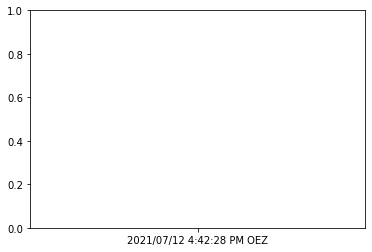

In [63]:
# questions related to the system
sys_dfabstr = dfabstr.iloc[:,6:-1]
#print(cop)
#plt.bar(sys_dfabstr)
plt.hist(dfabstr)
#plt.show()